In [2]:
import pandas as pd


In [3]:
df = pd.read_csv('Car_Insurance_Claim.csv')

In [5]:
print(df.dtypes)

AGE                     object
GENDER                  object
RACE                    object
DRIVING_EXPERIENCE      object
EDUCATION               object
INCOME                  object
CREDIT_SCORE           float64
VEHICLE_OWNERSHIP      float64
VEHICLE_YEAR            object
MARRIED                float64
CHILDREN               float64
POSTAL_CODE              int64
ANNUAL_MILEAGE         float64
VEHICLE_TYPE            object
SPEEDING_VIOLATIONS      int64
DUIS                     int64
PAST_ACCIDENTS           int64
OUTCOME                float64
dtype: object


In [10]:
print(df.isnull().sum())

ID                          0
AGE                         0
GENDER                      0
RACE                        0
DRIVING_EXPERIENCE          0
EDUCATION                   0
INCOME                      0
CREDIT_SCORE              982
VEHICLE_OWNERSHIP           0
VEHICLE_YEAR                0
MARRIED                     0
CHILDREN                    0
POSTAL_CODE                 0
ANNUAL_MILEAGE            957
VEHICLE_TYPE                0
SPEEDING_VIOLATIONS         0
DUIS                        0
PAST_ACCIDENTS              0
OUTCOME                     0
CREDIT_SCORE_missing        0
ANNUAL_MILEAGE_missing      0
dtype: int64


In [12]:
# כמה רשומות חסרות בשני המשתנים יחד
missing_both = (df['CREDIT_SCORE'].isna() & df['ANNUAL_MILEAGE'].isna()).sum()

# כמה רשומות יש בסך הכול
total_rows = len(df)

# אחוז הרשומות שחסר בהן שני המשתנים
percent_missing_both = missing_both / total_rows * 100

missing_both, percent_missing_both


(np.int64(88), np.float64(0.88))

In [5]:
# CREDIT_SCORE missing → outcome distribution
print("=== CREDIT_SCORE missing → OUTCOME distribution ===")
print(df[df['CREDIT_SCORE'].isna()]['OUTCOME'].value_counts(normalize=True) * 100)

print("\n=== ANNUAL_MILEAGE missing → OUTCOME distribution ===")
print(df[df['ANNUAL_MILEAGE'].isna()]['OUTCOME'].value_counts(normalize=True) * 100)


=== CREDIT_SCORE missing → OUTCOME distribution ===
OUTCOME
0.0    69.04277
1.0    30.95723
Name: proportion, dtype: float64

=== ANNUAL_MILEAGE missing → OUTCOME distribution ===
OUTCOME
0.0    66.248694
1.0    33.751306
Name: proportion, dtype: float64


In [32]:
df = df.drop(columns=['ID'])


In [8]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    print(f"\n--- {col} (%) ---")
    print((df[col].value_counts(normalize=True) * 100).round(2).astype(str) + '%')


--- AGE (%) ---
AGE
26-39    30.63%
40-64    29.31%
16-25    20.16%
65+       19.9%
Name: proportion, dtype: object

--- GENDER (%) ---
GENDER
female    50.1%
male      49.9%
Name: proportion, dtype: object

--- RACE (%) ---
RACE
majority    90.12%
minority     9.88%
Name: proportion, dtype: object

--- DRIVING_EXPERIENCE (%) ---
DRIVING_EXPERIENCE
0-9y       35.3%
10-19y    32.99%
20-29y    21.19%
30y+      10.52%
Name: proportion, dtype: object

--- EDUCATION (%) ---
EDUCATION
high school    41.57%
university     39.28%
none           19.15%
Name: proportion, dtype: object

--- INCOME (%) ---
INCOME
upper class      43.36%
middle class     21.38%
poverty          18.14%
working class    17.12%
Name: proportion, dtype: object

--- VEHICLE_YEAR (%) ---
VEHICLE_YEAR
before 2015    69.67%
after 2015     30.33%
Name: proportion, dtype: object

--- VEHICLE_TYPE (%) ---
VEHICLE_TYPE
sedan         95.23%
sports car     4.77%
Name: proportion, dtype: object


In [13]:
cols = [
    'VEHICLE_OWNERSHIP',
    'MARRIED',
    'CHILDREN',
    'POSTAL_CODE',
    'VEHICLE_TYPE',
    'SPEEDING_VIOLATIONS',
    'DUIS',
    'PAST_ACCIDENTS',
    'OUTCOME'
]

for col in cols:
    print(f"\n--- {col} (%) ---")
    print((df[col].value_counts(normalize=True) * 100).round(2).astype(str) + '%')



--- VEHICLE_OWNERSHIP (%) ---
VEHICLE_OWNERSHIP
1.0    69.7%
0.0    30.3%
Name: proportion, dtype: object

--- MARRIED (%) ---
MARRIED
0.0    50.18%
1.0    49.82%
Name: proportion, dtype: object

--- CHILDREN (%) ---
CHILDREN
1.0    68.88%
0.0    31.12%
Name: proportion, dtype: object

--- POSTAL_CODE (%) ---
POSTAL_CODE
10238     69.4%
32765    24.56%
92101     4.84%
21217      1.2%
Name: proportion, dtype: object

--- VEHICLE_TYPE (%) ---
VEHICLE_TYPE
sedan         95.23%
sports car     4.77%
Name: proportion, dtype: object

--- SPEEDING_VIOLATIONS (%) ---
SPEEDING_VIOLATIONS
0     50.28%
1     15.44%
2     11.61%
3       8.3%
4       5.3%
5      3.19%
6      1.88%
7       1.4%
8      0.75%
10      0.5%
9      0.49%
11      0.3%
12      0.2%
13     0.12%
15     0.08%
14     0.05%
16     0.04%
17     0.03%
19     0.02%
18     0.01%
22     0.01%
Name: proportion, dtype: object

--- DUIS (%) ---
DUIS
0    81.18%
1     14.7%
2     3.31%
3     0.68%
4      0.1%
5     0.02%
6     0.01%
Na

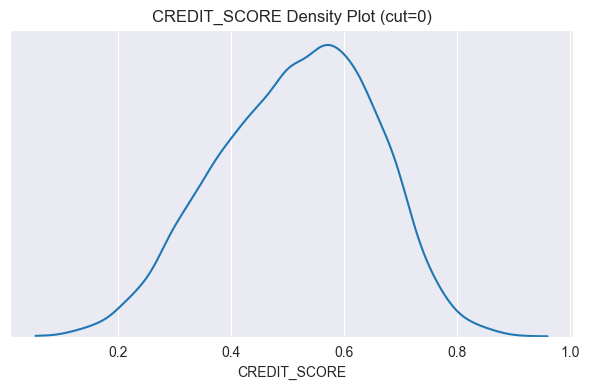

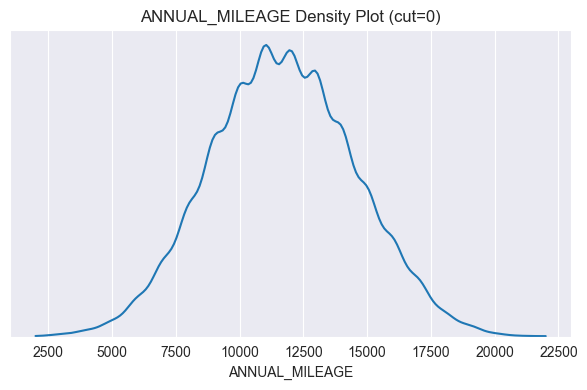

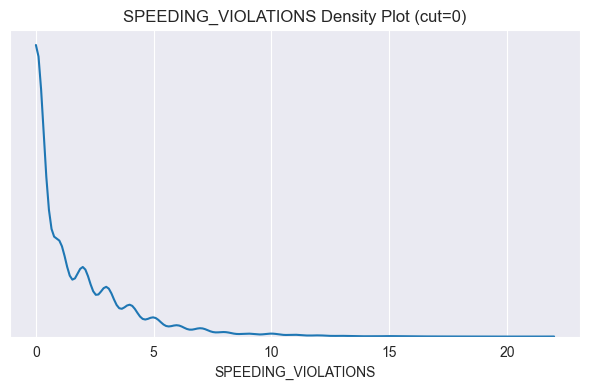

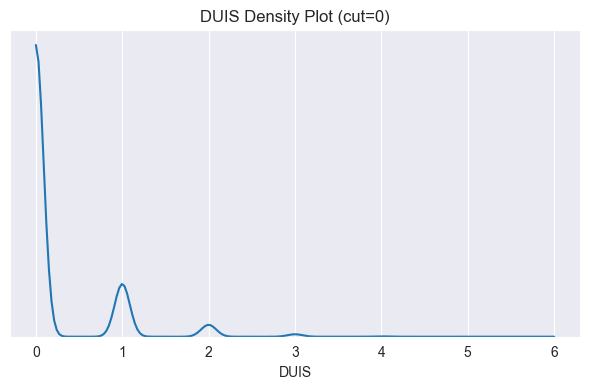

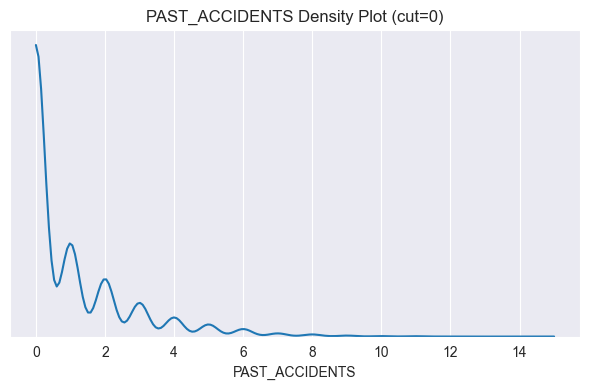

In [7]:
import matplotlib.pyplot as plt

cols = [
    'CREDIT_SCORE',
    'ANNUAL_MILEAGE',
    'SPEEDING_VIOLATIONS',
    'DUIS',
    'PAST_ACCIDENTS'
]

import seaborn as sns
import matplotlib.pyplot as plt

for col in cols:
    plt.figure(figsize=(6,4))
    sns.kdeplot(df[col].dropna(), cut=0)
    plt.title(f'{col} Density Plot (cut=0)')

    # ביטול ציר Y
    plt.gca().get_yaxis().set_visible(False)

    plt.tight_layout()
    plt.show()



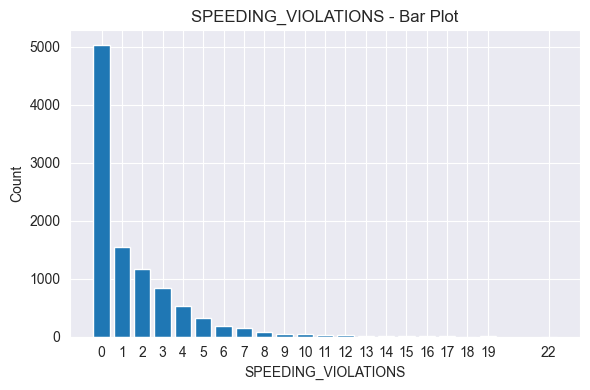

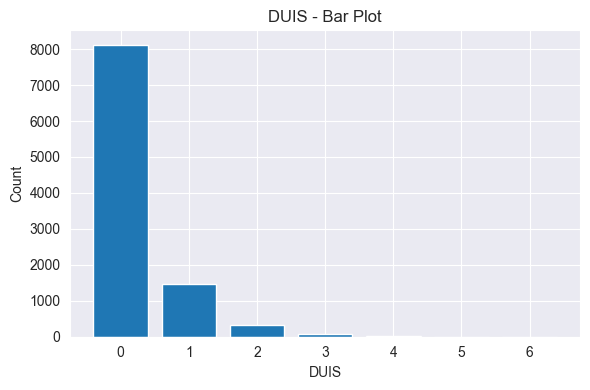

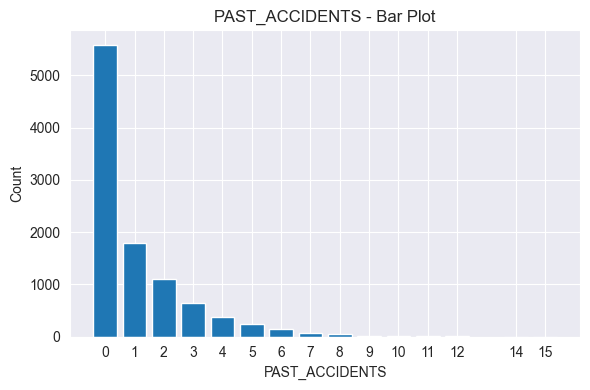

In [8]:
import matplotlib.pyplot as plt

bar_cols = ['SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS']

for col in bar_cols:
    plt.figure(figsize=(6,4))

    # ספירת כל ערך
    counts = df[col].value_counts().sort_index()

    plt.bar(counts.index, counts.values)
    plt.title(f'{col} - Bar Plot')
    plt.xlabel(col)
    plt.ylabel('Count')

    plt.xticks(counts.index)  # לוודא שכל הערכים מופיעים בציר X
    plt.tight_layout()
    plt.show()


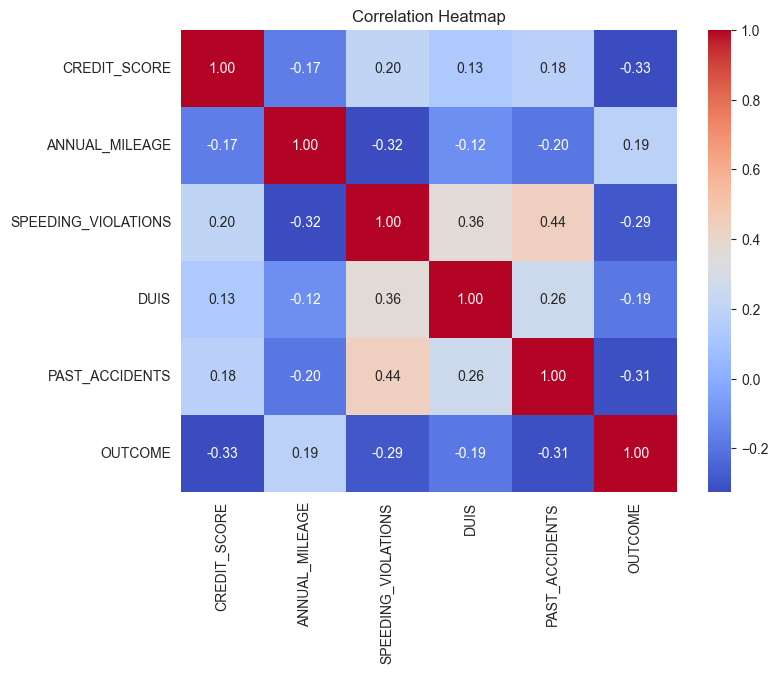

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only continuous variables
continuous_cols = [
    'CREDIT_SCORE',
    'ANNUAL_MILEAGE',
    'SPEEDING_VIOLATIONS',
    'DUIS',
    'PAST_ACCIDENTS',
    'OUTCOME'
]

plt.figure(figsize=(8,6))
sns.heatmap(df[continuous_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


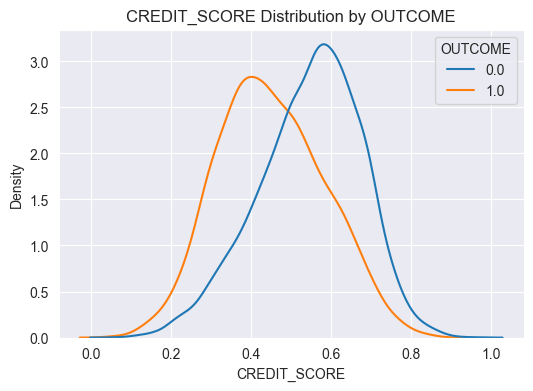

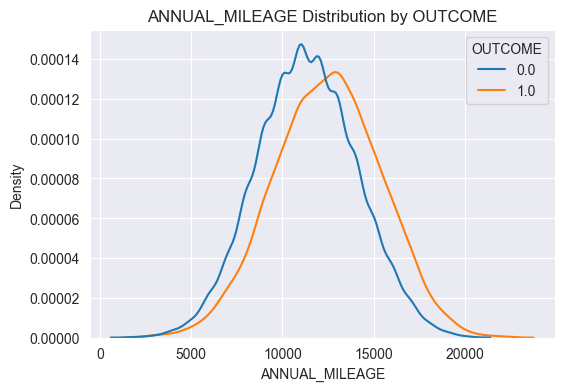

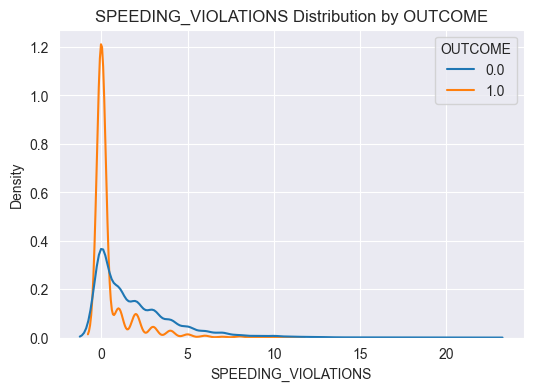

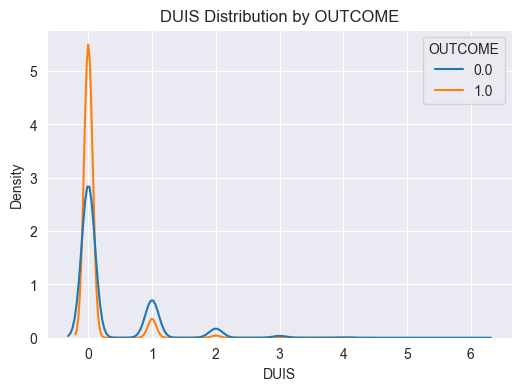

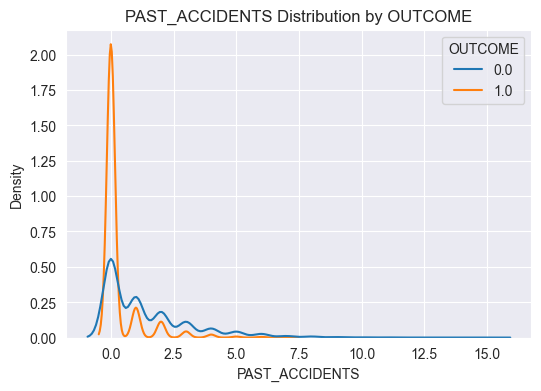

In [15]:
for col in ['CREDIT_SCORE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS']:
    plt.figure(figsize=(6,4))
    sns.kdeplot(data=df, x=col, hue='OUTCOME', common_norm=False)
    plt.title(f'{col} Distribution by OUTCOME')
    plt.show()


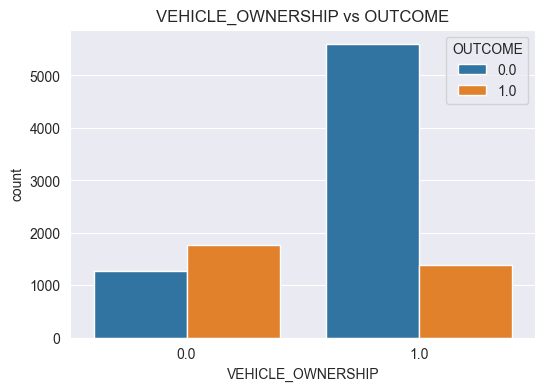

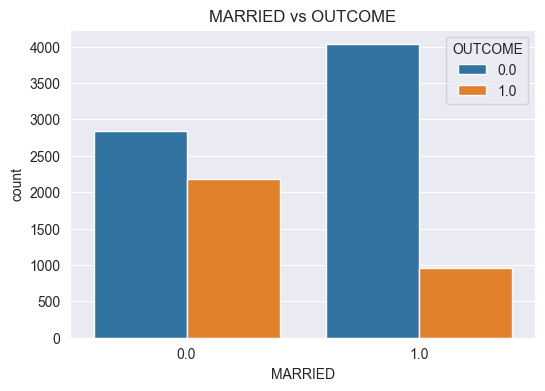

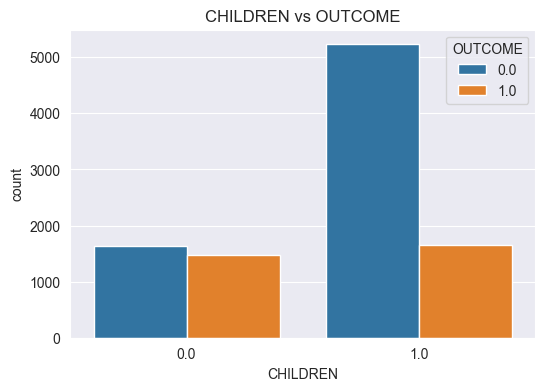

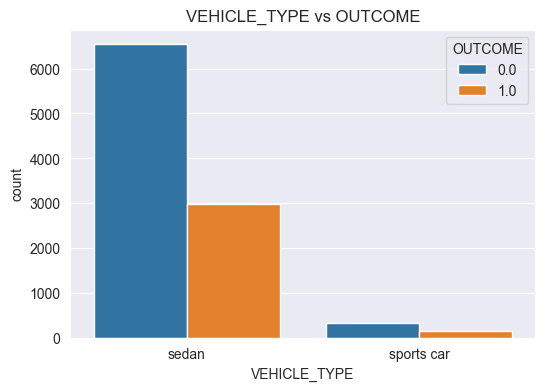

In [16]:
for col in ['VEHICLE_OWNERSHIP','MARRIED','CHILDREN','VEHICLE_TYPE']:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, hue='OUTCOME')
    plt.title(f'{col} vs OUTCOME')
    plt.show()


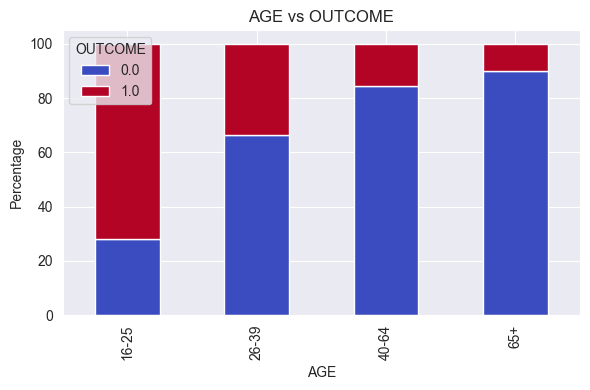

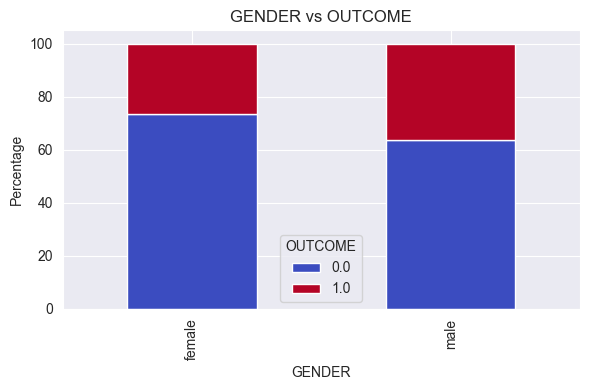

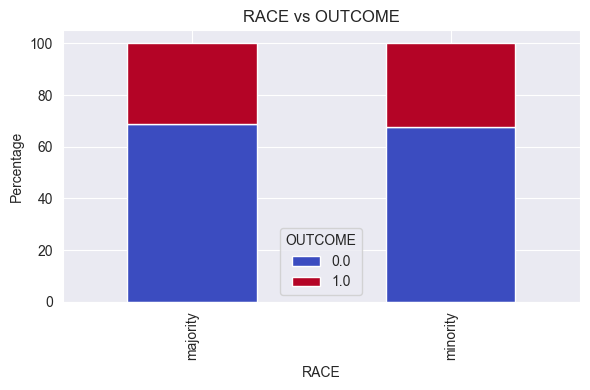

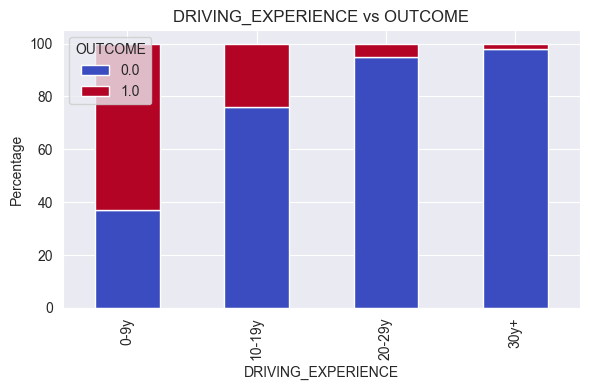

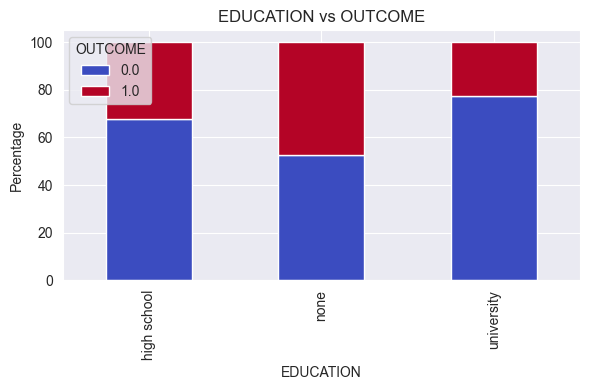

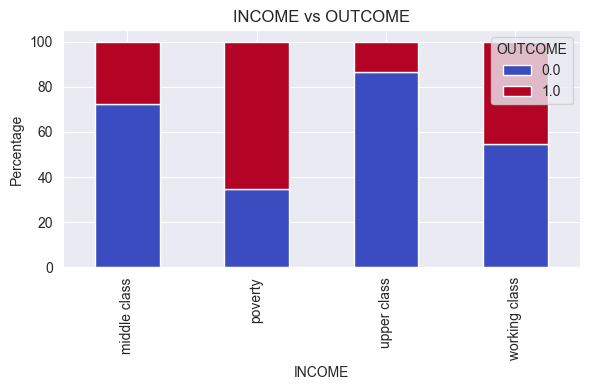

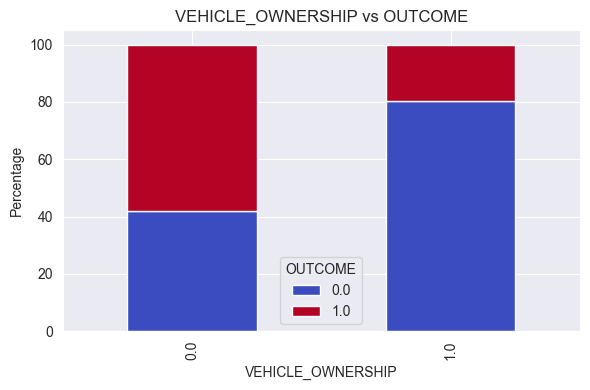

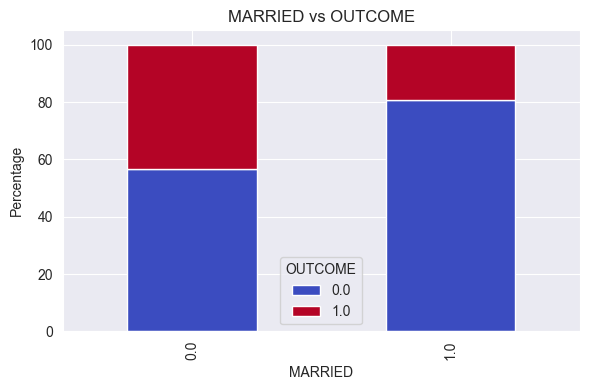

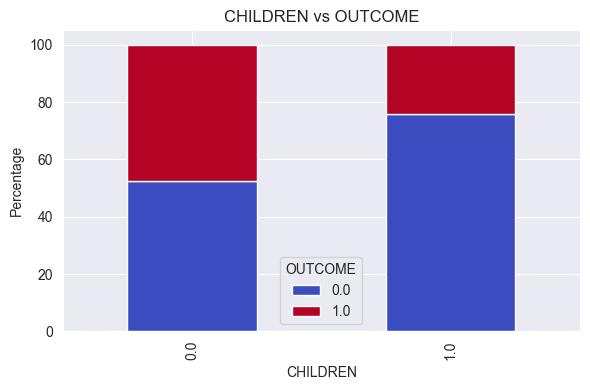

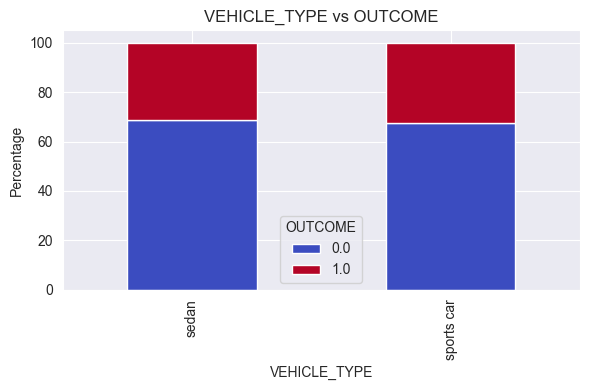

In [17]:
categorical_cols = [
    'AGE','GENDER','RACE','DRIVING_EXPERIENCE','EDUCATION',
    'INCOME','VEHICLE_OWNERSHIP','MARRIED','CHILDREN','VEHICLE_TYPE'
]

for col in categorical_cols:
    prop_df = pd.crosstab(df[col], df['OUTCOME'], normalize='index') * 100
    prop_df.plot(kind='bar', stacked=True, figsize=(6,4), colormap='coolwarm')
    plt.ylabel('Percentage')
    plt.title(f'{col} vs OUTCOME')
    plt.legend(title='OUTCOME')
    plt.tight_layout()
    plt.show()


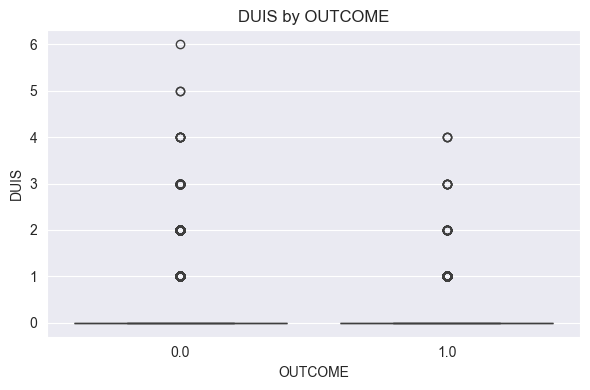

In [9]:

plt.figure(figsize=(6,4))
sns.boxplot(x='OUTCOME', y='DUIS', data=df)
plt.title('DUIS by OUTCOME')
plt.xlabel('OUTCOME')
plt.ylabel('DUIS')
plt.tight_layout()
plt.show()

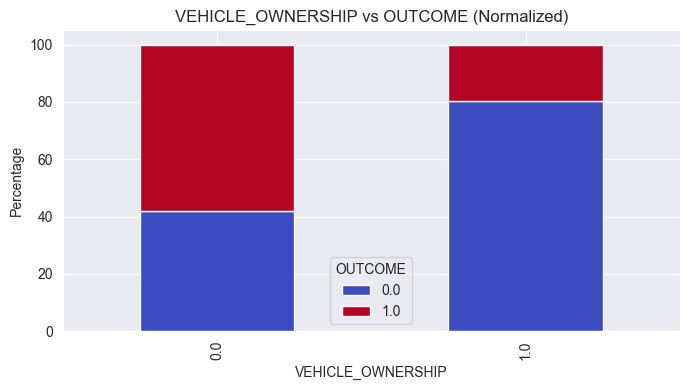

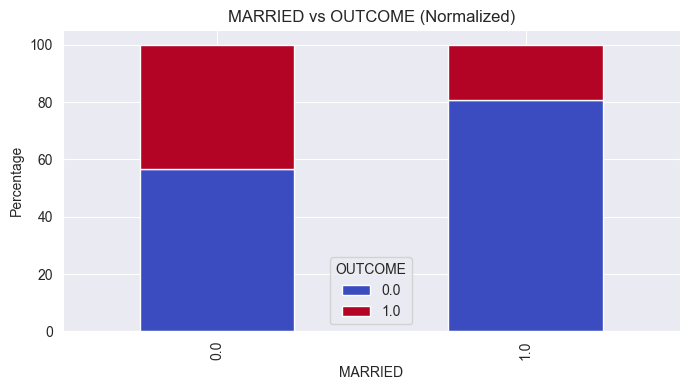

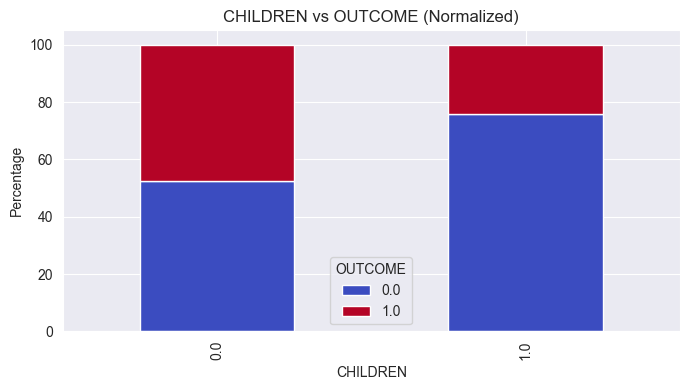

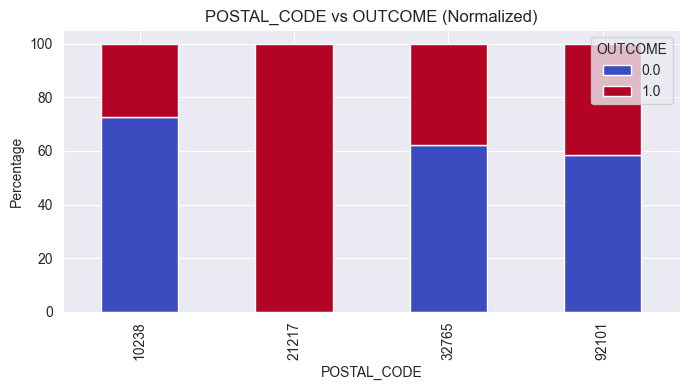

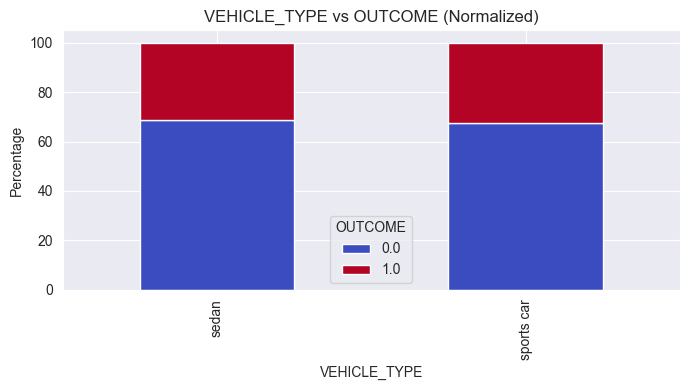

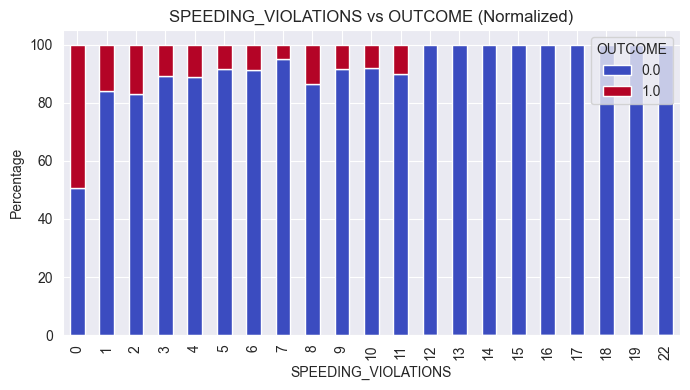

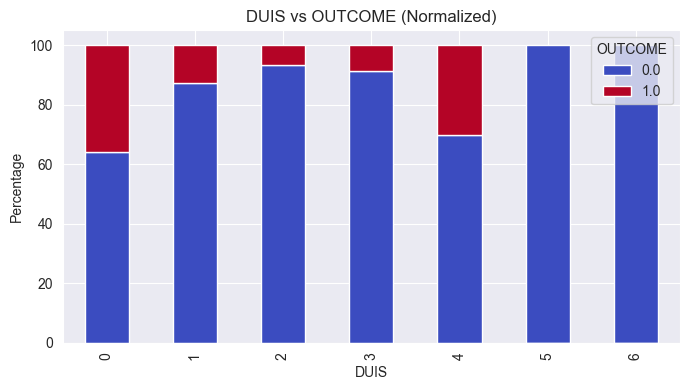

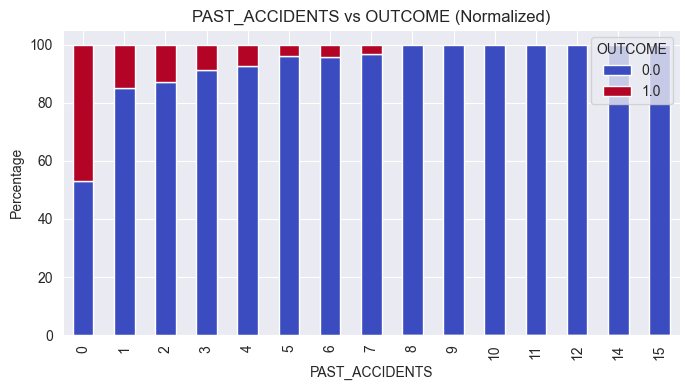

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# List of categorical/numeric-but-discrete features to plot vs OUTCOME
cols = [
    'VEHICLE_OWNERSHIP',
    'MARRIED',
    'CHILDREN',
    'POSTAL_CODE',
    'VEHICLE_TYPE',
    'SPEEDING_VIOLATIONS',
    'DUIS',
    'PAST_ACCIDENTS'
]

for col in cols:
    # Compute normalized percentages
    prop_df = pd.crosstab(df[col], df['OUTCOME'], normalize='index') * 100

    # Plot stacked bar chart
    prop_df.plot(kind='bar', stacked=True, figsize=(7,4), colormap='coolwarm')
    plt.ylabel('Percentage')
    plt.title(f'{col} vs OUTCOME (Normalized)')
    plt.legend(title='OUTCOME')
    plt.tight_layout()
    plt.show()


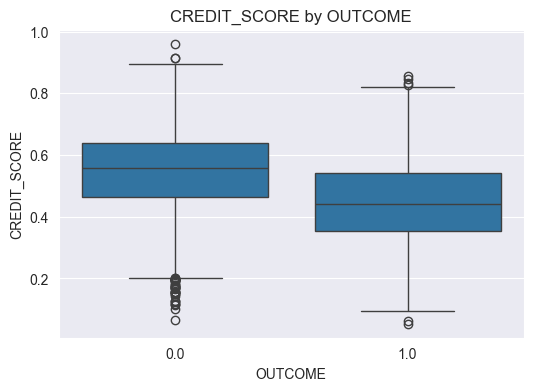

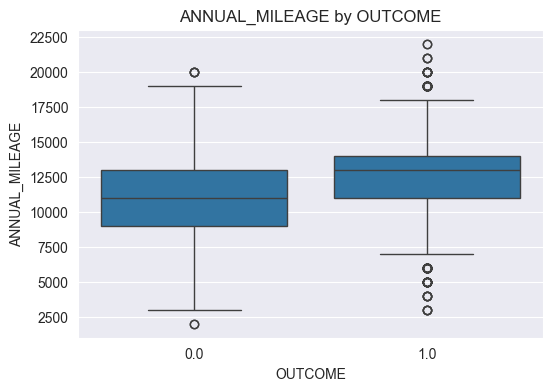

In [28]:
continuous_cols = ['CREDIT_SCORE', 'ANNUAL_MILEAGE']
for col in continuous_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='OUTCOME', y=col, data=df)
    plt.title(f'{col} by OUTCOME')
    plt.show()


In [33]:
df.isnull().sum()
df.isnull().mean() * 100  # percentage missing


AGE                    0.00
GENDER                 0.00
RACE                   0.00
DRIVING_EXPERIENCE     0.00
EDUCATION              0.00
INCOME                 0.00
CREDIT_SCORE           9.82
VEHICLE_OWNERSHIP      0.00
VEHICLE_YEAR           0.00
MARRIED                0.00
CHILDREN               0.00
POSTAL_CODE            0.00
ANNUAL_MILEAGE         9.57
VEHICLE_TYPE           0.00
SPEEDING_VIOLATIONS    0.00
DUIS                   0.00
PAST_ACCIDENTS         0.00
OUTCOME                0.00
dtype: float64

In [34]:
age_map = {
    '16-25': 0,
    '26-39': 1,
    '40-64': 2,
    '65+': 3
}

df['AGE'] = df['AGE'].map(age_map)

exp_map = {
    '0-9y': 0,
    '10-19y': 1,
    '20-29y': 2,
    '30y+': 3
}

df['DRIVING_EXPERIENCE'] = df['DRIVING_EXPERIENCE'].map(exp_map)

education_map = {'none':0, 'high school':1, 'university':2}
df['EDUCATION'] = df['EDUCATION'].map(education_map)

# Ordinal encoding for INCOME
income_mapping = {
    'poverty': 0,
    'working class': 1,
    'middle class': 2,
    'upper class': 3
}

df['INCOME'] = df['INCOME'].map(income_mapping)

